### Code for statistical tests comparing news coverage across news publishers

In [2]:
### To run for different classes, some modifications may be needed. Modifications are commented out, use depending on the class you are evaluating. 
### The changes are needed different classes have different label names and file names. 

In [ ]:
import pandas as pd
import numpy as np
import sys

from scipy import stats
from scipy.stats import ttest_ind
import pingouin as pg

pd.set_option('display.max_colwidth', None)

In [1083]:
# data = pd.read_csv('../results/GazaNews_with_moral_scores.csv')
label = 'villain'
data = pd.read_csv(f'results/news_analysis/Label_{label}.csv')
# data_villain = pd.read_csv('results/news_analysis/Label_3a.csv')
# data_victim = pd.read_csv('results/news_analysis/Label_3b.csv')
# data_mft = pd.read_csv('../ASP/github_code/results/GazaNews_with_moral_scores.csv')

In [1084]:
data['date'] = pd.to_datetime(data['publish_date'], format='%Y-%m-%d')
data['media'] = data.media_name.str.replace('aljazeera.com', 'alj').str.replace('foxnews.com', 'fox').str.replace('bbc.com', 'bbc').str.replace('bbc.co.uk', 'bbc')
data.media.value_counts()

/tmp/ipykernel_2224105/138197406.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['media'] = data.media_name.str.replace('aljazeera.com', 'alj').str.replace('foxnews.com', 'fox').str.replace('bbc.com', 'bbc').str.replace('bbc.co.uk', 'bbc')


alj    4321
fox    3114
bbc    2221
Name: media, dtype: int64

In [1085]:
data.columns, data.shape

(Index(['Unnamed: 0', 'id', 'indexed_date', 'language', 'media_name',
        'media_url', 'publish_date', 'headline', 'url', 'labels',
        'entity_labels', 'lab', 'entities', 'lang', 'pal_ent', 'hamas_ent',
        'isr_ent', 'other_ent', 'date', 'Lab_3b', 'Label_3b', 'score_Hamas',
        'score_Israel', 'score_None', 'score_Palestine', 'media'],
       dtype='object'),
 (9656, 26))

In [1086]:
# data = data.rename(columns = {'score_IE': 'temp'}).rename(columns = {'score_VE': 'score_IE'}).rename(columns = {'temp': 'score_VE'})

In [1087]:
# data[['score_BC', 'score_WC']] = data[['score_BC', 'score_WC']].div(data[['score_BC', 'score_WC']].sum(axis=1), axis=0)
# data[['score_ES', 'score_PS']] = data[['score_ES', 'score_PS']].div(data[['score_ES', 'score_PS']].sum(axis=1), axis=0)
# data[['score_IE', 'score_VE']] = data[['score_IE', 'score_VE']].div(data[['score_IE', 'score_VE']].sum(axis=1), axis=0)

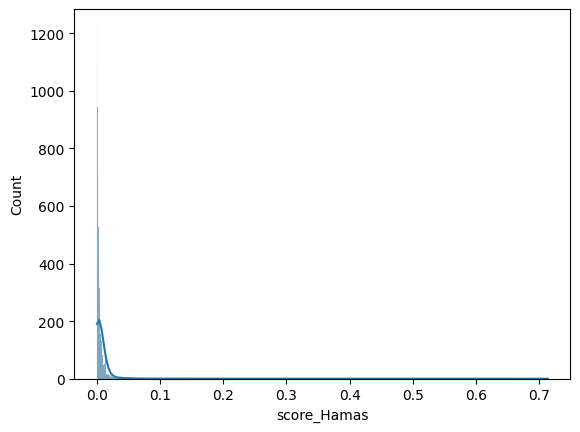

In [1088]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
import pandas as pd
import numpy as np

attr = 'score_Hamas'
sns.histplot(data[attr], kde=True)
# sns.histplot(alj.score_Israel, kde=True)
# alj.score_Israel
plt.show()

In [1089]:
# alj = israel_entity_mentioned_df[israel_entity_mentioned_df.media == 'alj']
# bbc = israel_entity_mentioned_df[israel_entity_mentioned_df.media == 'bbc']
# fox = israel_entity_mentioned_df[israel_entity_mentioned_df.media == 'fox']

In [1090]:
no_entity_mentioned_df = data[data[['pal_ent', 'hamas_ent', 'isr_ent', 'other_ent']].eq(False).all(axis = 1)]
pal_entity_mentioned_df = data[((data.pal_ent == True) & (data.hamas_ent == False) & (data.isr_ent == False) & (data.other_ent == False))]
hamas_entity_mentioned_df = data[((data.pal_ent == False) & (data.hamas_ent == True) & (data.isr_ent == False) & (data.other_ent == False))]
israel_entity_mentioned_df = data[((data.pal_ent == False) & (data.hamas_ent == False) & (data.isr_ent == True) & (data.other_ent == False))]
other_entity_mentioned_df = data[((data.pal_ent == False) & (data.hamas_ent == False) & (data.isr_ent == False) & (data.other_ent == True))]
other_entity_mentioned_df = pd.concat((no_entity_mentioned_df, other_entity_mentioned_df), axis = 0)

In [1091]:
pal_entity_mentioned_df.shape, hamas_entity_mentioned_df.shape, israel_entity_mentioned_df.shape, other_entity_mentioned_df.shape

((586, 26), (517, 26), (2725, 26), (1449, 26))

In [1092]:
# grouped_mean = israel_entity_mentioned_df.groupby('media')['score_BC'].mean()
# alj, bbc, fox = grouped_mean['alj'], grouped_mean['bbc'], grouped_mean['fox']

In [1093]:
def check_normality(df, attr):
    
    alj = df[df.media == 'alj'][attr]
    bbc = df[df.media == 'bbc'][attr]
    fox = df[df.media == 'fox'][attr]
    
    shapiro = []
    
    for dist in [alj, bbc, fox]:
        p_val_shapiro = stats.shapiro(dist)[1]
        shapiro.append(p_val_shapiro)
    return shapiro

def get_shapiro_normality(df):

    shapiro_p = []
    
    # for attr in ['score_BC', 'score_WC', 'score_None']:
    # for attr in ['score_ES', 'score_PS', 'score_None']:
    # for attr in ['score_IE', 'score_VE', 'score_None']:
    for attr in ['score_Hamas', 'score_Israel', 'score_None', 'score_Palestine']:
    # for attr in ['score_O', 'score_S']:
        # attr = 'cr_norm_' + attr + '_sent'
        shap_p_val = check_normality(df, attr)
        shapiro_p.append(shap_p_val)
        
    return shapiro_p

In [1094]:
pal_shapiro_norm = get_shapiro_normality(pal_entity_mentioned_df)
hamas_shapiro_norm = get_shapiro_normality(hamas_entity_mentioned_df)
israel_shapiro_norm = get_shapiro_normality(israel_entity_mentioned_df)
other_shapiro_norm = get_shapiro_normality(other_entity_mentioned_df)

pal_shapiro_norm, hamas_shapiro_norm, israel_shapiro_norm, other_shapiro_norm

([[3.5170483901662564e-35, 4.989396541019484e-22, 1.9377151261323888e-07],
  [2.3961352152268358e-33, 1.4146322636199118e-19, 1.038764994160113e-11],
  [1.7071715373387377e-21, 2.0953041818955187e-13, 3.4899025336265765e-10],
  [2.0030409006573635e-22, 1.2535331218941747e-14, 3.6057210535792342e-16]],
 [[3.4518637287689393e-19, 1.6657836846366177e-19, 2.1276165631239207e-32],
  [3.87805639017164e-18, 9.45460970933976e-15, 1.1458497101514277e-17],
  [9.049769614244418e-12, 4.0965791869851387e-10, 4.150238671880944e-15],
  [1.8295206902810992e-17, 2.171521575109415e-18, 1.7157428275901503e-29]],
 [[0.0, 6.146399951201244e-35, 0.0],
  [0.0, 7.80065627634103e-36, 5.962458331157521e-36],
  [3.851615124756435e-38, 5.2116661926829795e-27, 3.798205812704635e-30],
  [4.473894778483628e-39, 6.615895723956401e-34, 1.5834672646870433e-43]],
 [[7.81924543093248e-43, 2.1589734500518999e-35, 4.986157129564734e-27],
  [4.498168070482663e-43, 2.7622885783233308e-39, 8.860984257631924e-20],
  [2.4286173

In [1095]:
def get_statistical_results(df, attr, test_type, effect_type = 'rbc'):
    
    alj = df[df.media == 'alj'][attr]
    bbc = df[df.media == 'bbc'][attr]
    fox = df[df.media == 'fox'][attr]
    
    # print(alj.sum()/alj.shape[0], bbc.sum()/bbc.shape[0], fox.sum()/fox.shape[0])

    p_val, effect_size, shap_p1, shap_p2, mwu_p_val, mwu_cles, mwu_rbc = [], [], [], [], [], [], []
    for p1, p2 in [(alj, bbc), (bbc, fox), (alj, fox)]:
        
        # print(p1.sum()/p1.shape[0], p2.sum()/p2.shape[0])
        
        if test_type == 'ttest':
            res = pg.ttest(p1, p2, paired=False)
            p_v, effect = res['p-val'][0], res['cohen-d'][0]
        
        if test_type == 'mwu':
            
            result = pg.mwu(p1, p2)
            p_v = result['p-val'][0]

            if effect_type == 'cles':
                effect = result['CLES'][0]

            elif effect_type == 'rbc':
                effect = result['RBC'][0]
                
            # print(result)
            # sys.exit()
     
        p_val.append(p_v)
        effect_size.append(effect)

    return shap_p1, shap_p2, p_val, effect_size


def get_results(df, test = 'ttest'):

    shapiro_p1, shapiro_p2, p_val, effect_size = [], [], [], []
    
    # for attr in ['score_BC', 'score_WC', 'score_None']:
    # for attr in ['score_ES', 'score_PS', 'score_None']:
    # for attr in ['score_IE', 'score_VE', 'score_None']:
    for attr in ['score_Hamas', 'score_Israel', 'score_None', 'score_Palestine']:
    # for attr in ['score_O', 'score_S']:
        shap_p1, shap_p2, p_v, effect = get_statistical_results(df, attr, test)
        p_val.append(p_v)
        effect_size.append(effect)
        shapiro_p1.append(shap_p1)
        shapiro_p2.append(shap_p2)
    
    # df_p_val = pd.DataFrame(p_val).T.rename(columns = {0:'BC_pval', 1:'WC_pval', 2:'None_pval'})
    # df_p_val = pd.DataFrame(p_val).T.rename(columns = {0:'ES_pval', 1:'PS_pval', 2:'None_pval'})
    # df_p_val = pd.DataFrame(p_val).T.rename(columns = {0:'IE_pval', 1:'VE_pval', 2:'None_pval'})
    df_p_val = pd.DataFrame(p_val).T.rename(columns = {0:'Hamas_pval', 1:'Israel_pval', 2:'None_pval', 3:'Palestine_pval'})
    # df_p_val = pd.DataFrame(p_val).T.rename(columns = {0:'O_pval', 1:'S_pval'})
    df_p_val['media'] = ['alj-bbc', 'bbc-fox', 'alj-fox']

    # df_effect = pd.DataFrame(effect_size).T.rename(columns = {0:'BC_es', 1:'WC_es', 2:'None_es'})
    # df_effect = pd.DataFrame(effect_size).T.rename(columns = {0:'ES_es', 1:'PS_es', 2:'None_es'})
    # df_effect = pd.DataFrame(effect_size).T.rename(columns = {0:'IE_es', 1:'VE_es', 2:'None_es'})
    df_effect = pd.DataFrame(effect_size).T.rename(columns = {0:'Hamas_es', 1:'Israel_es', 2:'None_es', 3:'Palestine_es'})
    # df_effect = pd.DataFrame(effect_size).T.rename(columns = {0:'O_es', 1:'S_es'})
    
    df_effect['media'] = ['alj-bbc', 'bbc-fox', 'alj-fox']

    df_res = df_p_val.merge(df_effect, on = 'media')
    cols = ['media'] + [col for col in df_res.columns if col != 'media']
    df_res = df_res[cols]
   
    
    return df_res

In [1096]:
# df_res3 = get_results(hamas_entity_mentioned_df, test)

In [1097]:
test = 'mwu'    # or mwu

# df_res1 = get_results(data, test)
df_res2 = get_results(pal_entity_mentioned_df, test)
df_res3 = get_results(hamas_entity_mentioned_df, test)
df_res4 = get_results(israel_entity_mentioned_df, test)
df_res5 = get_results(other_entity_mentioned_df, test)

In [1098]:
# df_res1

In [1099]:
df_res2['Entity'] = ['Palestine'] * 3
df_res3['Entity'] = ['Hamas'] * 3
df_res4['Entity'] = ['Israel'] * 3
df_res5['Entity'] = ['Other'] * 3

In [1100]:
result = pd.concat((df_res2, df_res3, df_res4, df_res5), axis = 0)
# .to_csv('ttest.csv')

In [1060]:
result['BC_es'] = result['BC_es'] * -1
result

,media,BC_pval,WC_pval,None_pval,BC_es,WC_es,None_es,Entity
0,alj-bbc,3.960869e-02,3.960869e-02,7.057524e-01,0.117761,0.117761,-0.021623,Palestine
1,bbc-fox,1.157961e-13,1.157961e-13,2.123100e-02,-0.611236,-0.611236,0.189810,Palestine
2,alj-fox,5.967348e-15,5.967348e-15,2.774092e-02,-0.568286,-0.568286,0.160284,Palestine
0,alj-bbc,8.249367e-03,8.249367e-03,7.551573e-01,0.198717,0.198717,-0.023521,Hamas
1,bbc-fox,3.336094e-09,3.336094e-09,4.450435e-03,-0.370902,-0.370902,0.178396,Hamas
2,alj-fox,5.327380e-04,5.327380e-04,6.573208e-03,-0.221801,-0.221801,0.174037,Hamas
0,alj-bbc,1.598863e-04,1.598863e-04,1.110850e-02,-0.108658,-0.108658,0.073086,Israel
1,bbc-fox,4.022444e-33,4.022444e-33,7.461585e-10,-0.373741,-0.373741,0.191894,Israel
2,alj-fox,4.483791e-72,4.483791e-72,1.516718e-28,-0.459061,-0.459061,0.283383,Israel
0,alj-bbc,4.069432e-04,4.069432e-04,1.049973e-02,0.116746,0.116746,-0.084498,Other


In [1061]:
result[['media', 'BC_pval', 'BC_es', 'Entity']].to_csv(f'results/statistical_test/Label_{label}.csv')
# result[['media', 'PS_pval', 'PS_es', 'Entity']].to_csv(f'results/statistical_test/Label_{label}.csv')
# result[['media', 'IE_pval', 'IE_es', 'Entity']].to_csv(f'results/statistical_test/Label_{label}.csv')
# result[['media', 'O_pval', 'O_es', 'Entity']].to_csv(f'results/statistical_test/Label_{label}.csv')

In [1101]:
res1 = result[result.Entity == 'Hamas'][['media', 'Hamas_pval', 'Hamas_es', 'Entity']].rename(columns = {'Hamas_pval': 'pval', 'Hamas_es': 'es'})
res2 = result[result.Entity == 'Palestine'][['media', 'Palestine_pval', 'Palestine_es', 'Entity']].rename(columns = {'Palestine_pval': 'pval', 'Palestine_es': 'es'})
res3 = result[result.Entity == 'Israel'][['media', 'Israel_pval', 'Israel_es', 'Entity']].rename(columns = {'Israel_pval': 'pval', 'Israel_es': 'es'})
res4 = result[result.Entity == 'Other'][['media', 'None_pval', 'None_es', 'Entity']].rename(columns = {'None_pval': 'pval', 'None_es': 'es'})

res = pd.concat((res2, res1, res3, res4), axis = 0)
res

,media,pval,es,Entity
0,alj-bbc,1.296099e-01,-0.086740,Palestine
1,bbc-fox,3.178975e-08,-0.455580,Palestine
2,alj-fox,1.688024e-14,-0.558658,Palestine
0,alj-bbc,4.275682e-01,0.059729,Hamas
1,bbc-fox,8.165306e-01,-0.014578,Hamas
2,alj-fox,5.261080e-01,0.040621,Hamas
0,alj-bbc,1.427233e-19,0.260482,Israel
1,bbc-fox,3.188287e-17,0.263073,Israel
2,alj-fox,1.235049e-94,0.527711,Israel
0,alj-bbc,8.886302e-04,0.109748,Other


In [1102]:
res['es'] = res['es'] * -1

In [1103]:
res.to_csv(f'results/statistical_test/Label_{label}.csv')

In [1104]:
df1 = pd.read_csv('results/statistical_test/Label_emotive.csv')
df2 = pd.read_csv('results/statistical_test/Label_effects.csv')
df3 = pd.read_csv('results/statistical_test/Label_source.csv')
df4 = pd.read_csv('results/statistical_test/Label_context.csv')
df5 = pd.read_csv('results/statistical_test/Label_villain.csv').rename(columns = {'pval': 'villain_pval', 'es': 'villain_es'})
df6 = pd.read_csv('results/statistical_test/Label_victim.csv').rename(columns = {'pval': 'victim_pval', 'es': 'victim_es'})

In [1105]:
df = pd.concat((df1, df2, df3, df4, df5, df6), axis = 1)

In [1106]:
df.to_csv('results/statistical_test/statistical_test.csv')